In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, precision_score, recall_score

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

import mglearn
from sklearn.datasets import load_breast_cancer, load_boston, load_iris, make_moons, load_digits, load_wine, load_diabetes

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree

from lightgbm import LGBMClassifier, LGBMRegressor, plot_importance, plot_tree, plot_metric

import statsmodels.api as sm

import os
os.environ["PATH"] += os.pathsep + "C:\\Program Files\\Graphviz\\bin"
from sklearn.tree import export_graphviz
import graphviz

# 1. Decision Tree

+ Graphviz
    - http://www.graphviz.org
    - pip install graphviz
    
+ 일련의 질문에 근거하여 주어진 데이터를 분류하는 알고리즘
+ 설명하기 좋은 알고리즘
+ 과적합이 거의 필수적으로 발생

In [2]:
!pip install graphviz

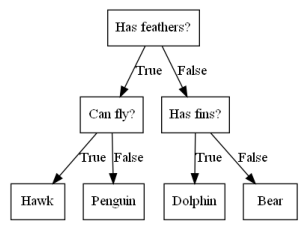

In [16]:
import os
os.environ["PATH"] += os.pathsep + "C:/Program Files/Graphviz/bin"

mglearn.plots.plot_animal_tree()

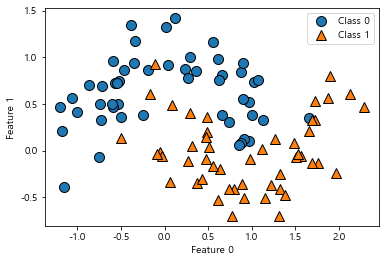

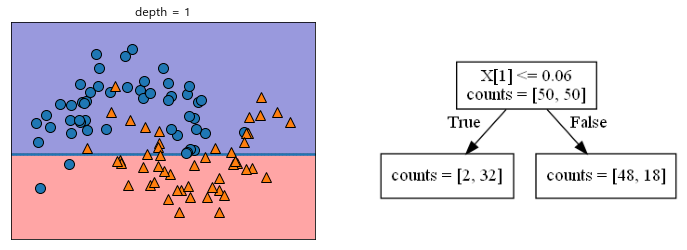

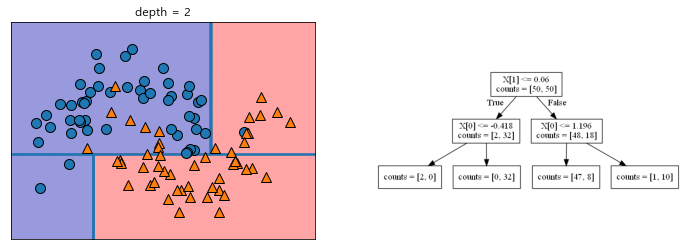

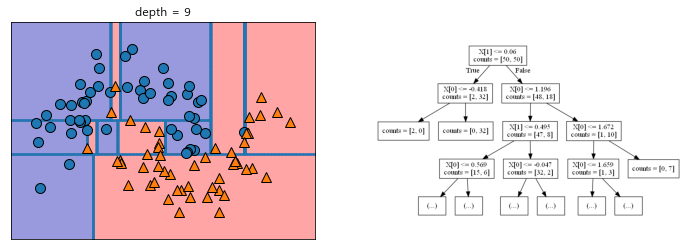

In [5]:
mglearn.plots.plot_tree_progressive()

## (1) 간단한 예

In [8]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=11,
                                                   test_size = 0.2)

dt_clf = DecisionTreeClassifier(random_state=155).fit(X_train, y_train)

In [11]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file='data/tree.dot',class_names=iris.target_names,
               feature_names=iris.feature_names, filled=True)

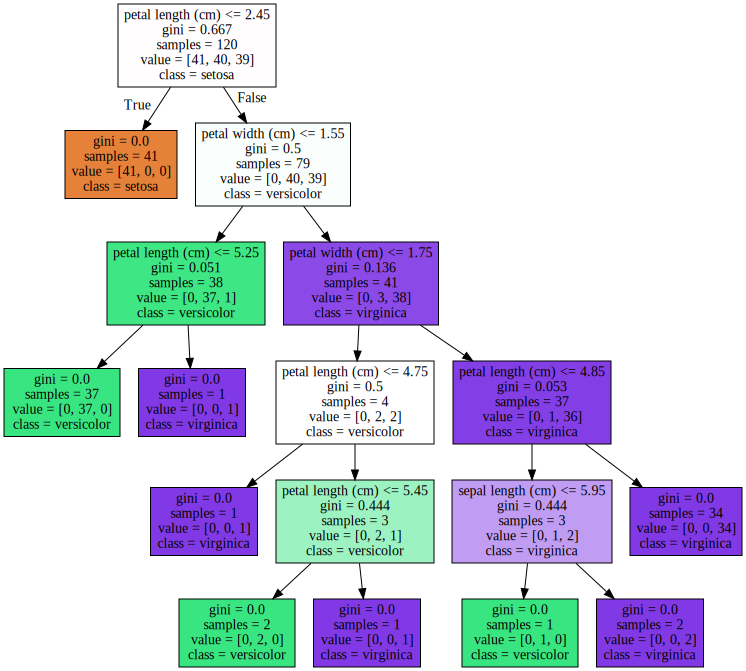

In [13]:
import graphviz

f = open('data/tree.dot')
graphviz.Source(f.read())

In [15]:
print("훈련 정확도 :", dt_clf.score(X_train, y_train))
print('테스트 정확도 : ',dt_clf.score(X_test, y_test))

훈련 정확도 : 1.0
테스트 정확도 :  0.8666666666666667


## (2) 과적합 해소를 위한 복잡도 제어 : Prunning(가지치기)

+ 종류
    - 사전 가지치기
    - 사후 가지치기
    - skelarn에서는 사후 가지치기만 지원
    
    
+ 파라미터
    - min_samples_split
    - min_samples_leaf
    - max_features
    - max_depth
    - max_leaf_nodes

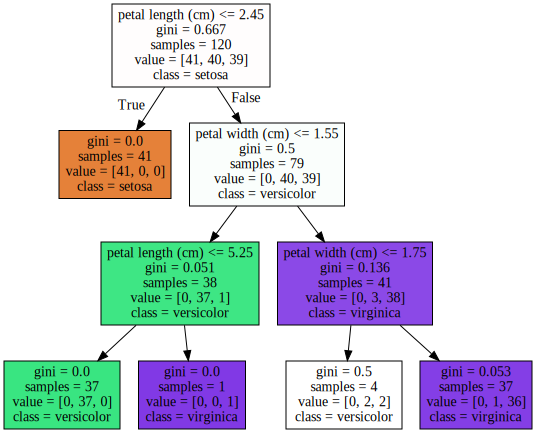

In [16]:
##### max_depth

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=11,
                                                   test_size = 0.2)

dt_clf = DecisionTreeClassifier(random_state=155, max_depth=3).fit(X_train, y_train)

export_graphviz(dt_clf, out_file='data/tree.dot',class_names=iris.target_names,
               feature_names=iris.feature_names, filled=True)

f = open('data/tree.dot')
graphviz.Source(f.read())

In [17]:
print("훈련 정확도 :", dt_clf.score(X_train, y_train))
print('테스트 정확도 : ',dt_clf.score(X_test, y_test))

훈련 정확도 : 0.975
테스트 정확도 :  0.9333333333333333


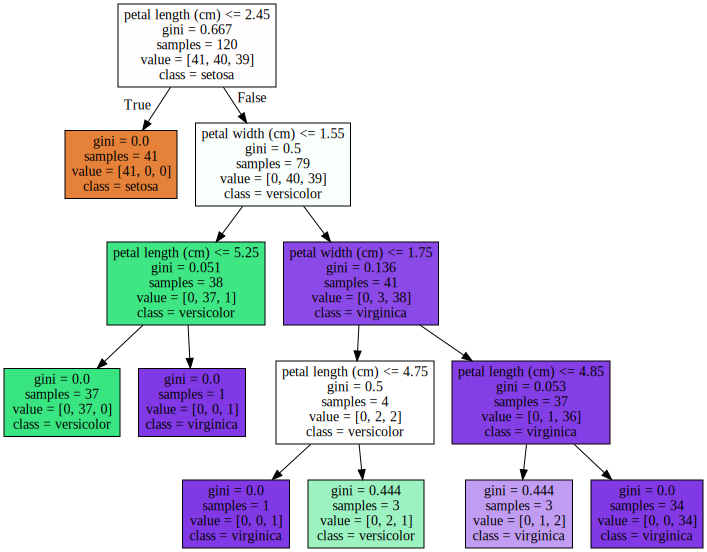

In [19]:
##### min_samples_split : 분할하기 위한 최소한의 샘플 수

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=11,
                                                   test_size = 0.2)

dt_clf = DecisionTreeClassifier(random_state=155, min_samples_split=4).fit(X_train, y_train)

export_graphviz(dt_clf, out_file='data/tree.dot',class_names=iris.target_names,
               feature_names=iris.feature_names, filled=True)

f = open('data/tree.dot')
graphviz.Source(f.read())

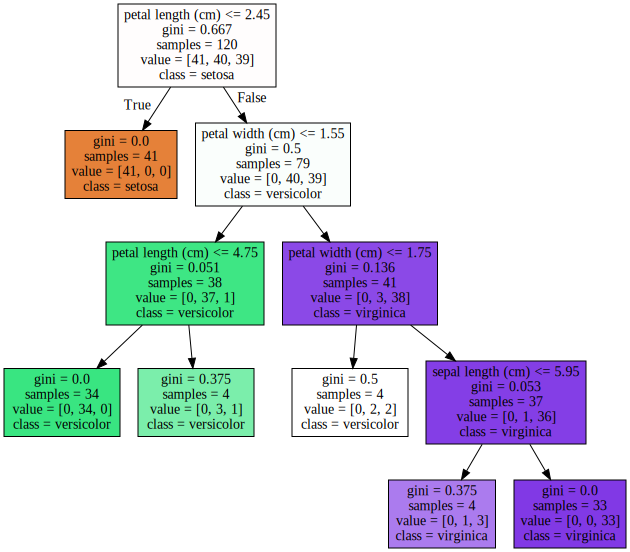

In [20]:
##### min_samples_leaf : 리프노드가 되기 위한 최소한의 샘플 수

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=11,
                                                   test_size = 0.2)

dt_clf = DecisionTreeClassifier(random_state=155, min_samples_leaf=4).fit(X_train, y_train)

export_graphviz(dt_clf, out_file='data/tree.dot',class_names=iris.target_names,
               feature_names=iris.feature_names, filled=True)

f = open('data/tree.dot')
graphviz.Source(f.read())

## (3) 성능 개선

### 1) 특성 중요도

In [3]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=11,
                                                   test_size=0.2)
dt_clf = DecisionTreeClassifier(random_state=155, min_samples_leaf=4).fit(X_train,y_train)

In [4]:
print("훈련 정확도: ", dt_clf.score(X_train, y_train))
print("테스트 정확도: ",dt_clf.score(X_test, y_test))

훈련 정확도:  0.9666666666666667
테스트 정확도:  0.9333333333333333


In [6]:
dir(dt_clf)
print(dt_clf.feature_importances_)
print(iris.feature_names)

[0.00594727 0.         0.5459484  0.44810433]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


<AxesSubplot:>

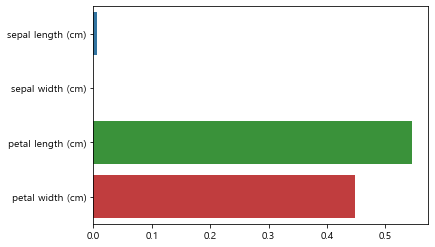

In [7]:
sns.barplot(x=dt_clf.feature_importances_, y=iris.feature_names)

### 2) 특성 중요도를 통해 추출한 특성만을 사용했을 때의 성능 개선 효과

In [8]:
X = iris.data[:, [2,3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [9]:
dt_clf = DecisionTreeClassifier(random_state=155, min_samples_leaf=4).fit(X_train, y_train)

print("훈련 정확도: ",dt_clf.score(X_train, y_train))
print("테스트 정확도: ",dt_clf.score(X_test, y_test))

훈련 정확도:  0.9821428571428571
테스트 정확도:  0.9736842105263158


### 3) Breast Cancer sample

In [11]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42,
                                                   stratify=cancer.target)

In [12]:
tree = DecisionTreeClassifier(random_state=0, max_depth=4).fit(X_train, y_train)

In [13]:
print("훈련 정확도: ",tree.score(X_train, y_train))
print("테스트 정확도: ",tree.score(X_test, y_test))

훈련 정확도:  0.9882629107981221
테스트 정확도:  0.951048951048951


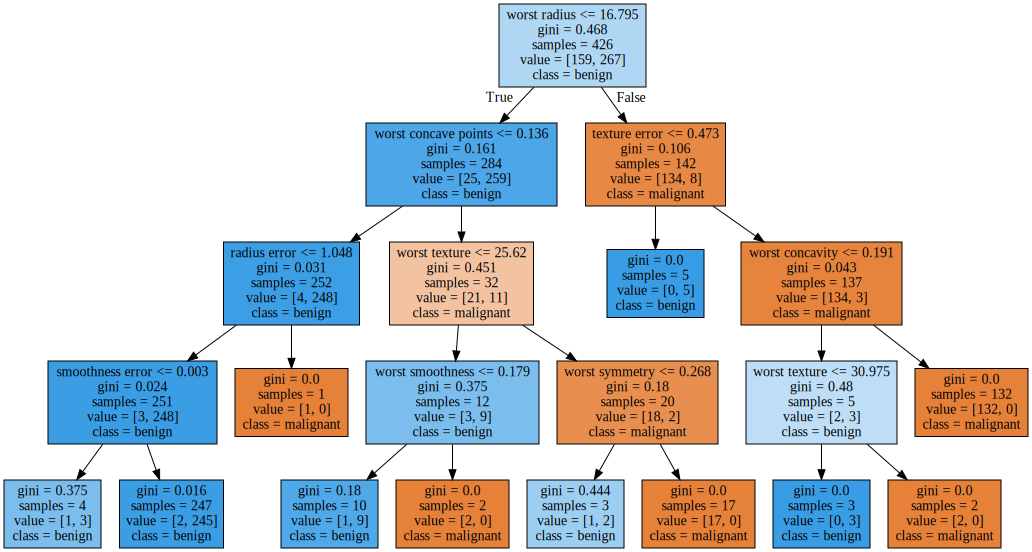

In [17]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file='data/tree.dot', class_names=cancer.target_names,
               feature_names=cancer.feature_names, filled=True)
f = open('data/tree.dot')
graphviz.Source(f.read())

In [20]:
#print(tree.feature_importances_)
#print(cancer.feature_names)

for name,value in zip(cancer.feature_names, tree.feature_importances_):
    print(name, value)

mean radius 0.0
mean texture 0.0
mean perimeter 0.0
mean area 0.0
mean smoothness 0.0
mean compactness 0.0
mean concavity 0.0
mean concave points 0.0
mean symmetry 0.0
mean fractal dimension 0.0
radius error 0.010197368202069328
texture error 0.0483982536186494
perimeter error 0.0
area error 0.0
smoothness error 0.002415595085315826
compactness error 0.0
concavity error 0.0
concave points error 0.0
symmetry error 0.0
fractal dimension error 0.0
worst radius 0.7268285094603201
worst texture 0.045815897088866304
worst perimeter 0.0
worst area 0.0
worst smoothness 0.014157702104714051
worst compactness 0.0
worst concavity 0.0181879968644502
worst concave points 0.12211319926548449
worst symmetry 0.01188547831013032
worst fractal dimension 0.0


<AxesSubplot:>

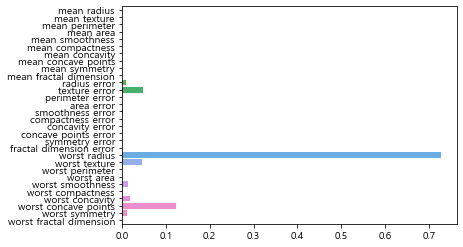

In [23]:
sns.barplot(x=tree.feature_importances_, y=cancer.feature_names)

## (4) 서울 지역 동 분류

+ 서울 지역(구)의 경도와 위도를 사용해서 임의로 지역(동)을 강동, 강서, 강남, 강북으로 분류

In [27]:
district_dict_list = [
            {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
            {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
            {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
            {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
            {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
            
            {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
            {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
            {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
            {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
            {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},
   
            {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
            {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
            {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
            {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
            {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},
     
            {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
            {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
            {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
            {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
            {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
         ]

In [28]:
train_df = pd.DataFrame(district_dict_list)
train_df

,district,latitude,longitude,label
0,Gangseo-gu,37.551000,126.849500,Gangseo
1,Yangcheon-gu,37.524240,126.855396,Gangseo
2,Guro-gu,37.495400,126.887400,Gangseo
3,Geumcheon-gu,37.451900,126.902000,Gangseo
4,Mapo-gu,37.560229,126.908728,Gangseo
5,Gwanak-gu,37.487517,126.915065,Gangnam
6,Dongjak-gu,37.512400,126.939300,Gangnam
7,Seocho-gu,37.483700,127.032400,Gangnam
8,Gangnam-gu,37.517200,127.047300,Gangnam
9,Songpa-gu,37.503510,127.117898,Gangnam


In [29]:
dong_dict_list = [
            {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
            {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
            {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
            {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
            {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},
            
            {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
            {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
            {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
            {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
            {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},
    
            {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
            {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
            {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
            {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
            {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},
    
            {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
            {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
            {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
            {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
            {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
         ]

In [30]:
test_df = pd.DataFrame(dong_dict_list)
test_df

,dong,latitude,longitude,label
0,Gaebong-dong,37.489853,126.854547,Gangseo
1,Gochuk-dong,37.501394,126.859245,Gangseo
2,Hwagok-dong,37.537759,126.847951,Gangseo
3,Banghwa-dong,37.575817,126.815719,Gangseo
4,Sangam-dong,37.577039,126.891620,Gangseo
5,Nonhyun-dong,37.508838,127.030720,Gangnam
6,Daechi-dong,37.501163,127.057193,Gangnam
7,Seocho-dong,37.486401,127.018281,Gangnam
8,Bangbae-dong,37.483279,126.988194,Gangnam
9,Dogok-dong,37.492896,127.043159,Gangnam


In [31]:
##### 현재 가지고 있는 데이터에서 레이블의 갯수 확인

print(train_df.label.value_counts())
print(test_df.label.value_counts())

Gangseo     5
Gangnam     5
Gangbuk     5
Gangdong    5
Name: label, dtype: int64
Gangseo     5
Gangnam     5
Gangbuk     5
Gangdong    5
Name: label, dtype: int64


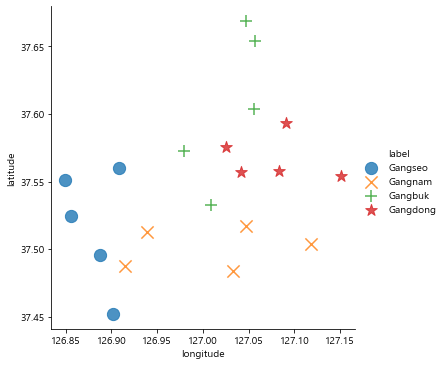

In [32]:
##### 데이터 시각화
sns.lmplot("longitude","latitude", data=train_df, fit_reg=False, hue="label",
          markers=["o", "x", "+", "*"], scatter_kws={"s":150})

In [33]:
##### 훈련에 필요없는 구이름과 동이름 삭제
train_df.drop(["district"], axis=1, inplace=True)
test_df.drop(["dong"],axis=1,inplace=True)

In [35]:
train_df
test_df

,latitude,longitude,label
0,37.489853,126.854547,Gangseo
1,37.501394,126.859245,Gangseo
2,37.537759,126.847951,Gangseo
3,37.575817,126.815719,Gangseo
4,37.577039,126.891620,Gangseo
5,37.508838,127.030720,Gangnam
6,37.501163,127.057193,Gangnam
7,37.486401,127.018281,Gangnam
8,37.483279,126.988194,Gangnam
9,37.492896,127.043159,Gangnam


In [36]:
X_train = train_df[["latitude", "longitude"]]
y_train = train_df[["label"]]

X_test = test_df[["latitude", "longitude"]]
y_test = test_df[["label"]]

In [37]:
##### Label을 숫자로 변환
le = LabelEncoder()
y_enc = le.fit_transform(y_train)
y_enc

array([3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [38]:
clf = DecisionTreeClassifier(random_state=35).fit(X_train, y_enc)

In [39]:
pred = clf.predict(X_test)
print("정확도 : ", accuracy_score(y_test.values, le.classes_[pred]))

정확도 :  1.0


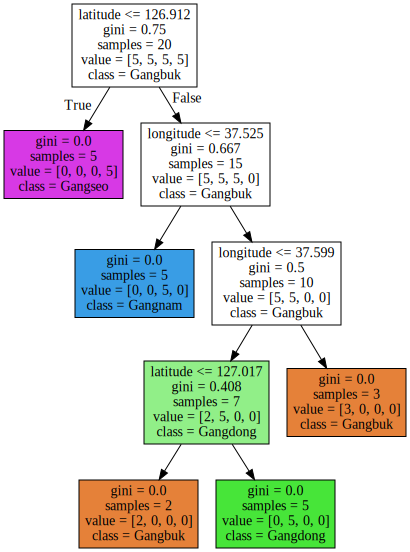

In [40]:
graph = export_graphviz(clf, out_file=None, class_names=["Gangbuk","Gangdong","Gangnam","Gangseo"],
                       feature_names=["longitude","latitude"], filled=True)
graphviz.Source(graph)

# 2. Random Forest


### Ensemble

- vote 방식
    - Soft Voting
    - Hard Voting
    
- 종류
    - Voting
        - 여러개의 분류기가 투표를 통해 최종 예측 결과를 결정
        - 같은 데이터셋에서 서로 다른 알고리즘을 가진 분류기를 결합
        
    - Bagging(Bootstrap Aggregating)
        - 서로 다른 샘플 데이터에서 각각의 분류기가 모두 같은 유형의 알고리즘을 기반
        - RandomForest
        
    - Boosting(Adaptive Boosting, Gradient Boosting)
        - 여러개의 분류기가 순차적으로 학습을 하되, 앞에서 학습한 분류기가 틀린 데이터에 대해서 올바르게 예측할 수 있도록 다음 분류기에서
            가중치를 부여
            
        - Gradient Boosting
        - XGBoost, Light GBM, Stacking, ...
    

In [42]:
X, y= make_moons(n_samples=100, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [49]:
forest = RandomForestClassifier(random_state=2, n_estimators=5).fit(X_train, y_train)

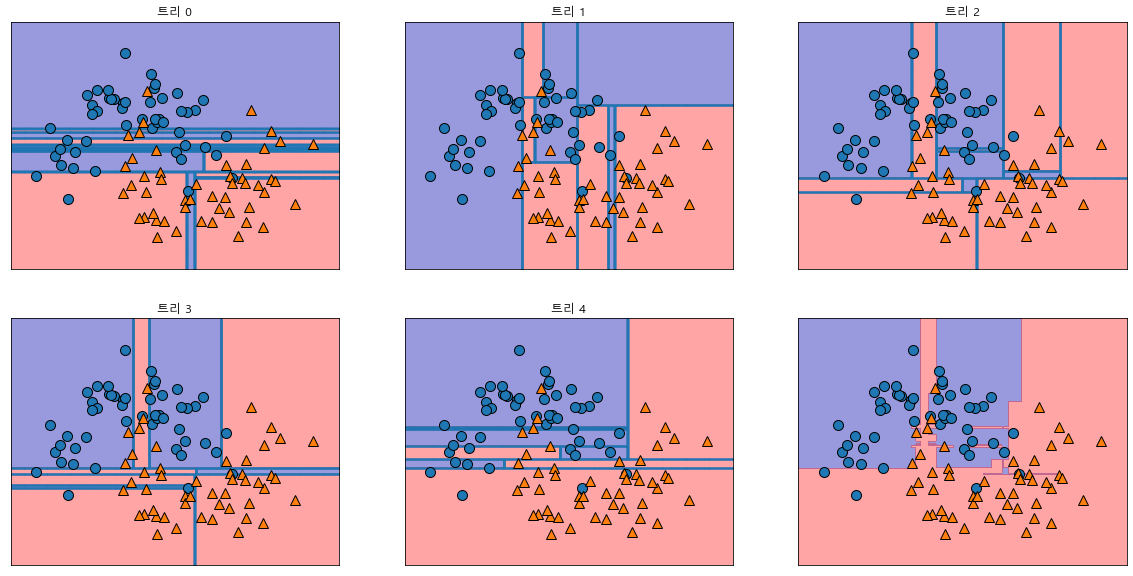

In [50]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=0.4)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

### (1) Decision Tree vs Random Forest

In [73]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [74]:
model1 = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

print("훈련 정확도 : ", model1.score(X_train, y_train))
print("테스트 정확도 : ", model1.score(X_test, y_test))

훈련 정확도 :  1.0
테스트 정확도 :  0.76


In [75]:
model2 = RandomForestClassifier(random_state=0, n_estimators=5).fit(X_train, y_train)

print("훈련 정확도 : ", model2.score(X_train, y_train))
print("테스트 정확도 : ", model2.score(X_test, y_test))

훈련 정확도 :  0.9866666666666667
테스트 정확도 :  0.88


---

In [76]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    random_state=0, stratify=cancer.target)

In [77]:
model1 = DecisionTreeClassifier(random_state=0, max_depth=3).fit(X_train, y_train)

print("훈련 정확도 : ", model1.score(X_train, y_train))
print("테스트 정확도 : ", model1.score(X_test, y_test))

훈련 정확도 :  0.9765258215962441
테스트 정확도 :  0.916083916083916


<AxesSubplot:>

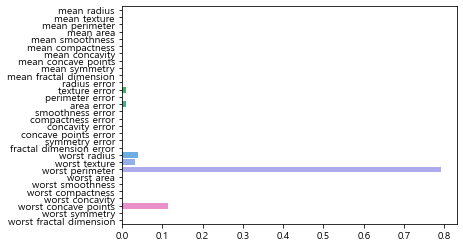

In [78]:
sns.barplot(x=model1.feature_importances_, y=cancer.feature_names)

In [79]:
model2 = RandomForestClassifier(random_state=0, n_estimators=100).fit(X_train, y_train)

print("훈련 정확도 : ", model2.score(X_train, y_train))
print("테스트 정확도 : ", model2.score(X_test, y_test))

훈련 정확도 :  0.9976525821596244
테스트 정확도 :  0.9440559440559441


<AxesSubplot:>

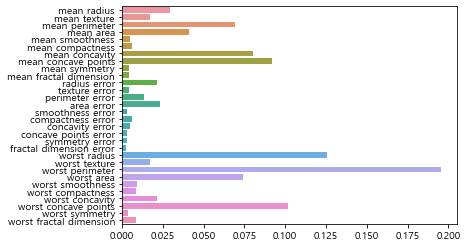

In [80]:
sns.barplot(x=model2.feature_importances_, y=cancer.feature_names)

In [83]:
mnist = load_digits()
print(mnist.data.shape)
mnist.target

(1797, 64)


array([0, 1, 2, ..., 8, 9, 8])

In [84]:
X, y = mnist.data, mnist.target

In [85]:
##### 교차 검증을 위한 공용 함수

def cross_validation(clf, features, labels):
    cv_scores=[]
    
    for i in range(10):
        scores = cross_val_score(clf, features, labels, cv=10, scoring="accuracy")
        cv_scores.append(scores.mean())
        
    return cv_scores

In [86]:
dt_cv_scores = cross_validation(DecisionTreeClassifier(), X, y)
rf_cv_scores = cross_validation(RandomForestClassifier(), X, y)

In [87]:
print(np.mean(dt_cv_scores))
print(np.mean(rf_cv_scores))

0.8270288640595902
0.9513054003724395


<AxesSubplot:>

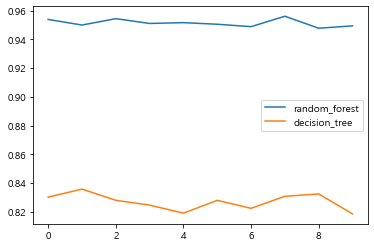

In [88]:
df = pd.DataFrame({"random_forest":rf_cv_scores, "decision_tree":dt_cv_scores})
df.plot()

## (2) 사례1 : 독버섯 데이터

- https://archive.ics.uci.edu/ml/datasets/mushroom
    + agaricus-leplota.data
    
- 파일명을 "mushrooms.csv"로 변경

In [5]:
import urllib.request as req

savedir = "data/mushrooms2.csv"
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
req.urlretrieve(url,savedir)
print("다운로드 완료")

다운로드 완료


In [10]:
mr = pd.read_csv('data/mushrooms.csv',header=None)
print(mr.shape)
mr.head()
# 0열에 p는 독버섯 e는 그냥버섯

(8124, 23)


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [12]:
##### 결측치 여부

mr.info()
mr.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       8124 non-null   object
 1   1       8124 non-null   object
 2   2       8124 non-null   object
 3   3       8124 non-null   object
 4   4       8124 non-null   object
 5   5       8124 non-null   object
 6   6       8124 non-null   object
 7   7       8124 non-null   object
 8   8       8124 non-null   object
 9   9       8124 non-null   object
 10  10      8124 non-null   object
 11  11      8124 non-null   object
 12  12      8124 non-null   object
 13  13      8124 non-null   object
 14  14      8124 non-null   object
 15  15      8124 non-null   object
 16  16      8124 non-null   object
 17  17      8124 non-null   object
 18  18      8124 non-null   object
 19  19      8124 non-null   object
 20  20      8124 non-null   object
 21  21      8124 non-null   object
 22  22      8124 non-null   

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
dtype: int64

In [13]:
mr.describe()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [15]:
##### feature와 label로 분리

X = mr.drop(0, axis=1)
y = mr[0]

In [16]:
X.head()
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: 0, Length: 8124, dtype: object

In [25]:
##### feature들의 숫자화

le = LabelEncoder()
for col in X.columns:
    X[col] = le.fit_transform(X[col])
    
y = le.fit_transform(y)

In [26]:
X

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [27]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [29]:
##### one hot encoding

X = pd.get_dummies(X, columns = X.columns)

In [30]:
X

,1_0,1_1,1_2,1_3,1_4,1_5,2_0,2_1,2_2,2_3,...,21_3,21_4,21_5,22_0,22_1,22_2,22_3,22_4,22_5,22_6
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [31]:
X_train, X_test , y_train, y_test = train_test_split(X, y)

In [33]:
##### RandomForest

random_clf = RandomForestClassifier().fit(X_train,y_train)
pred = random_clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1036
           1       1.00      1.00      1.00       995

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [34]:
##### Decision Tree

decision_clf = DecisionTreeClassifier().fit(X_train, y_train)
pred = decision_clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1036
           1       1.00      1.00      1.00       995

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [35]:
##### KNN

knn_clf = KNeighborsClassifier().fit(X_train, y_train)
pred = knn_clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1036
           1       1.00      1.00      1.00       995

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [36]:
##### Logistic Regression

logistic_clf = LogisticRegression().fit(X_train, y_train)
pred = logistic_clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1036
           1       1.00      1.00      1.00       995

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



# 3. Gradient Boosting Model

+ 분류와 회귀에서 모두 사용 가능
+ 이전 트리의 오차를 보완하는 방식으로 트리 생성(경사 하강법(Gradient Descent Algorithm))
+ 랜덤 포레스트 보다는 매개변수 설정에 조금 더 민감하지만 잘 조정하면 더 높은 정확도 제공
+ learning_rate 파라미터를 사용하여 오차 보정
+ XG Boost, Light GBM, ....

In [37]:
cancer = load_breast_cancer()
X_train, X_test , y_train, y_test = train_test_split(cancer.data, cancer.target,random_state=42)

In [38]:
?GradientBoostingClassifier

In [41]:
tree = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)

print("훈련 정확도 :", tree.score(X_train, y_train))
print("테스트 정확도 :", tree.score(X_test, y_test))

훈련 정확도 : 1.0
테스트 정확도 : 0.958041958041958


---

In [70]:
X, y = make_moons(n_samples=1000, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify = y)


In [71]:
##### RandomForest

clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)

print("훈련 정확도 : ", clf.score(X_train, y_train))
print("테스트 정확도 :", clf.score(X_test, y_test))

훈련 정확도 :  1.0
테스트 정확도 : 0.936


In [72]:
params = {"n_estimators": [100, 200, 300],
         "max_depth": [2, 3, 4, 5, 6, 7, 8, 9],
         "min_samples_leaf": [1, 2, 3, 4, 5],
         "min_samples_split": [4, 8, 10, 11, 12, 13, 14]}

clf2 = RandomForestClassifier(random_state=0, n_jobs=-1) #n_jobs : cpu 모두사용
grid_cv = GridSearchCV(clf2, param_grid=params, n_jobs=-1, cv=2)
grid_cv.fit(X_train,y_train)

UnicodeEncodeError: 'ascii' codec can't encode characters in position 18-20: ordinal not in range(128)

In [62]:
print("훈련 정확도 : ", grid_cv.score(X_train, y_train))
print("테스트 정확도 :", grid_cv.score(X_test, y_test))

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [63]:
##### GradientBoostingModel

clf3 = GradientBoostingClassifier(random_state=0).fit(X_train,y_train)

print("훈련 정확도 : ", clf3.score(X_train, y_train))
print("테스트 정확도 :", clf3.score(X_test, y_test))

훈련 정확도 :  0.988
테스트 정확도 : 0.932


In [64]:
params = {"n_estimators": [100, 200, 300],
         "max_depth": [2, 3, 4, 5, 6, 7, 8, 9],
         "min_samples_leaf": [1, 2, 3, 4, 5],
         "min_samples_split": [4, 8, 10, 11, 12, 13, 14]}

clf2 = GradientBoostingClassifier(random_state=0) #n_jobs : cpu 모두사용
grid_cv = GridSearchCV(clf2, param_grid=params, n_jobs=-1, cv=2)
grid_cv.fit(X_train,y_train)

UnicodeEncodeError: 'ascii' codec can't encode characters in position 18-20: ordinal not in range(128)

In [65]:
print("훈련 정확도 : ", grid_cv.score(X_train, y_train))
print("테스트 정확도 :", grid_cv.score(X_test, y_test))

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## (1) XGBoost

- 트리 기반의 앙상블 기법
- 분류에 있어서는 다른 알고리즘보다 좋은 예측 성능을 보여준다.
- XGBoost는 GBM기반이지만, GBM의 단점인 느린 수행과 과적합 규제 부재동의 문제를 해결
- 병렬 CPU 환경에서 빠르게 학습가능

In [10]:
!pip3 install cmake

In [11]:
!pip3 install xgboost

### 1) XGBClassifier

+ iris sample

In [14]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=.2,
                                                   random_state=123)

In [16]:
# n_estimators: 생성할 tree 개수
xgbc = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgbc.fit(X_train, y_train)

print("훈련 정확도 : ", xgbc.score(X_train, y_train))
print("테스트 정확도 :", xgbc.score(X_test, y_test))

[10:03:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "learning_late" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:03:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
훈련 정확도 :  1.0
테스트 정확도 : 0.9666666666666667


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

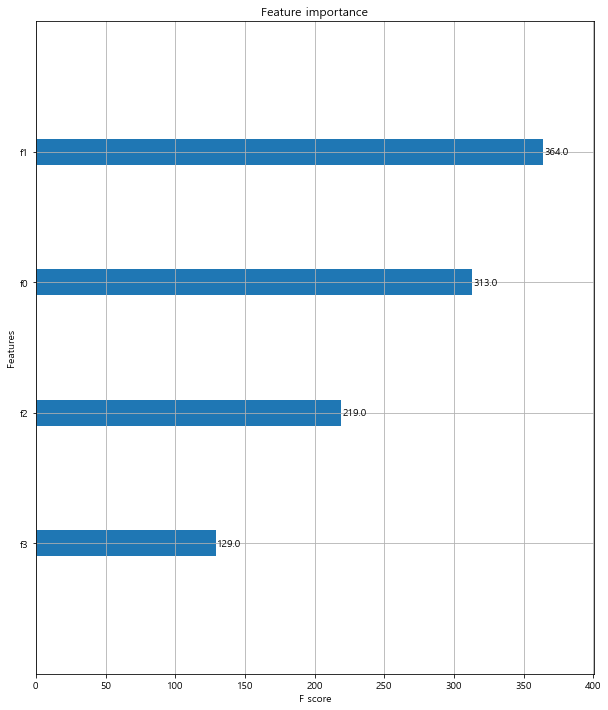

In [18]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgbc, ax=ax)

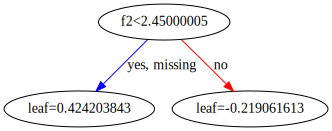

In [20]:
xgb.to_graphviz(xgbc)

+ wine sample

In [25]:
wine = load_wine()
wine.feature_names
wine.target_names
wine.data.shape

(178, 13)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=.2,
                                                   random_state=23)

xgbc = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgbc.fit(X_train, y_train)

print("훈련 정확도 : ", xgbc.score(X_train, y_train))
print("테스트 정확도 :", xgbc.score(X_test, y_test))

[10:20:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "learning_late" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:20:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
훈련 정확도 :  1.0
테스트 정확도 : 1.0


In [29]:
cross_val = cross_validate(estimator=xgbc, X=wine.data, y=wine.target, cv=5)
cross_val

[10:38:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "learning_late" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:38:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:38:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "learning_late" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly

{'fit_time': array([0.59946966, 0.85315609, 0.58401799, 0.59992957, 0.59795022]),
 'score_time': array([0.00498676, 0.00498676, 0.00398922, 0.00498652, 0.00498748]),
 'test_score': array([0.94444444, 0.91666667, 0.91666667, 0.97142857, 1.        ])}

In [30]:
print("테스트 정확도 평균 : ", cross_val["test_score"].mean())

테스트 정확도 평균 :  0.9498412698412698


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

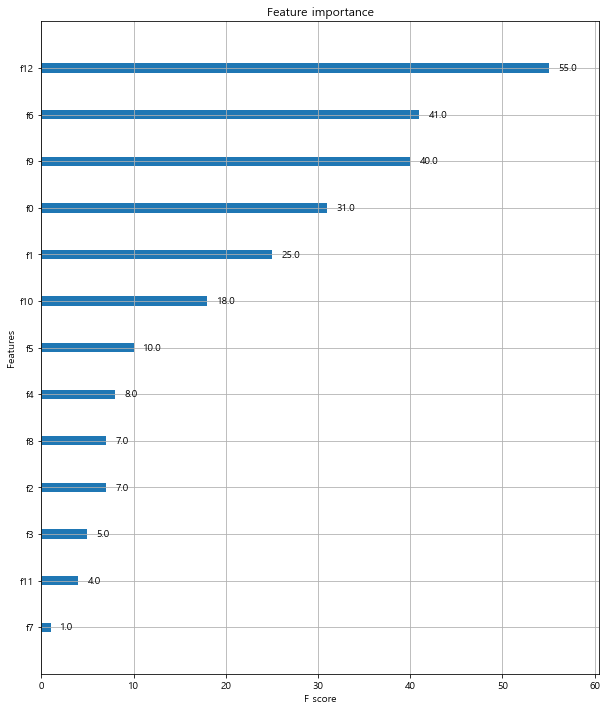

In [31]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgbc, ax=ax)

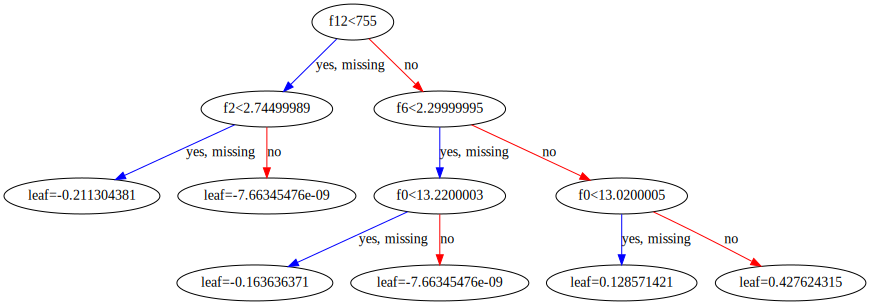

In [32]:
xgb.to_graphviz(xgbc)

+ 유방암 데이터 

In [36]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=.2,
                                                   random_state=123)

xgbc = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgbc.fit(X_train, y_train)

print("훈련 정확도 : ", xgbc.score(X_train, y_train))
print("테스트 정확도 :", xgbc.score(X_test, y_test))

[10:51:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "learning_late" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:51:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
훈련 정확도 :  1.0
테스트 정확도 : 0.9824561403508771


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

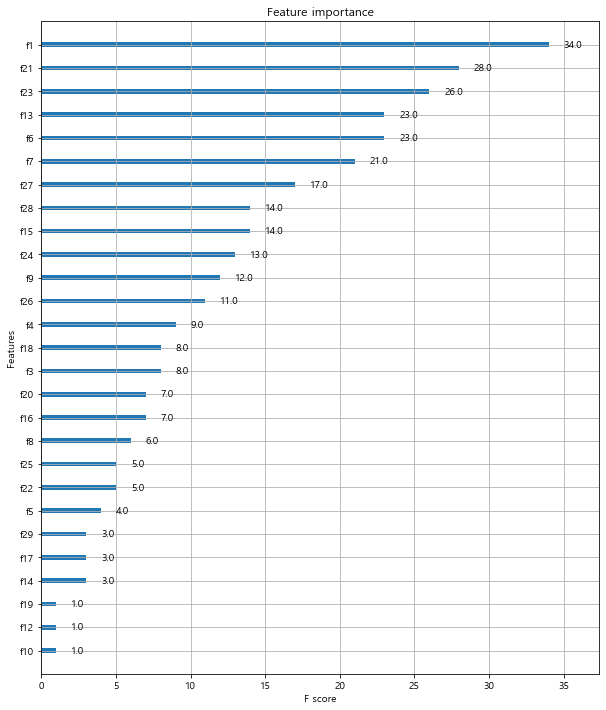

In [37]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgbc, ax=ax)

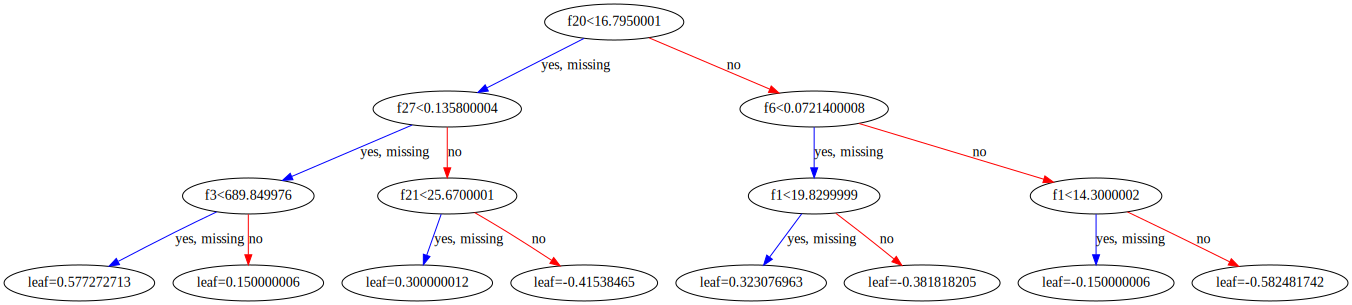

In [38]:
xgb.to_graphviz(xgbc)

In [39]:
cross_val = cross_validate(estimator=xgbc, X=cancer.data, y=cancer.target, cv=5)
cross_val

[10:54:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "learning_late" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:54:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:54:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "learning_late" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly 

{'fit_time': array([0.60398722, 0.94413257, 0.57881546, 0.69007325, 0.70013666]),
 'score_time': array([0.00698161, 0.00698209, 0.00900197, 0.01111364, 0.00897574]),
 'test_score': array([0.96491228, 0.96491228, 0.99122807, 0.97368421, 0.96460177])}

In [40]:
print("테스트 정확도 평균 : ", cross_val["test_score"].mean())

테스트 정확도 평균 :  0.9718677224033534


### 2) XGBRegressor

+ Boston Housing Sample

In [41]:
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=.2,
                                                   random_state=123)

xgbr = XGBRegressor(n_estimators=400, learning_rate=0.1, max_depth=3, objective="reg:squarederror")
xgbr.fit(X_train, y_train)

print("훈련 정확도 : ", xgbr.score(X_train, y_train))
print("테스트 정확도 :", xgbr.score(X_test, y_test))

훈련 정확도 :  0.9972630325759281
테스트 정확도 : 0.8151645284726049


In [42]:
cross_val = cross_validate(estimator=xgbr, X=boston.data, y=boston.target, cv=5)
print("테스트 정확도 평균 : ", cross_val["test_score"].mean())

테스트 정확도 평균 :  0.6884390736705599


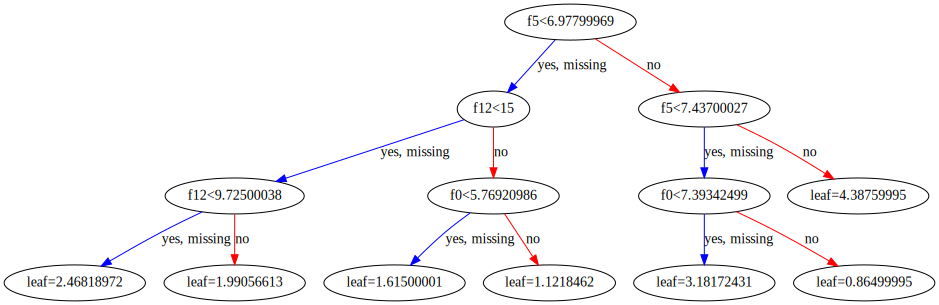

In [43]:
xgb.to_graphviz(xgbr) # 균형 트리가 만들어짐 : 앙상블의 특징 ! 깊이가 깊어지는 것을 최대한 막아줌

+ 당뇨병 데이터 샘플

In [51]:
diabetes = load_diabetes()
diabetes.feature_names
diabetes.target
diabetes.data.shape

(442, 10)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=.2,
                                                   random_state=123)

xgbr = XGBRegressor(n_estimators=400, learning_rate=0.1, max_depth=3, objective="reg:squarederror")
xgbr.fit(X_train, y_train)

print("훈련 정확도 : ", xgbr.score(X_train, y_train))
print("테스트 정확도 :", xgbr.score(X_test, y_test))

훈련 정확도 :  0.9679523032821651
테스트 정확도 : 0.45470848778208584


In [53]:
cross_val = cross_validate(estimator=xgbr, X=diabetes.data, y=diabetes.target, cv=5)
print("테스트 정확도 평균 : ", cross_val["test_score"].mean())

테스트 정확도 평균 :  0.30005291115066424


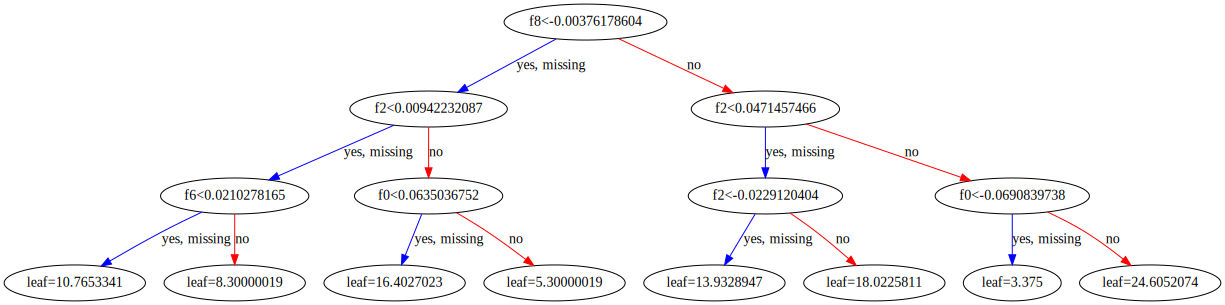

In [54]:
xgb.to_graphviz(xgbr) 

## (2) LightGBM


+ 빠른 학습과 예측 시간
+ 더 적은 메모리 사용
+ 범주형 특징의 자동 변환과 최적 분할

In [55]:
!pip install lightgbm

### 1) LGBMClassifier

+ 붓꽃 데이터

In [61]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=.2,
                                                   random_state=123)


In [64]:
lgbc = LGBMClassifier(n_estimators=400)

# early_stopping_rounds : 목표치를 찾으면 더이상 훈련하지 않고 끝내라고 지정해주는 파라미터
# verbose : 관련정보를 자세히 보여줌
lgbc.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss",
        eval_set=[(X_test, y_test)], verbose=True) # 최소 100번 돌고 그 다음부턴 중단 가능

[1]	valid_0's multi_logloss: 0.95847
[2]	valid_0's multi_logloss: 0.832184
[3]	valid_0's multi_logloss: 0.731164
[4]	valid_0's multi_logloss: 0.641056
[5]	valid_0's multi_logloss: 0.571726
[6]	valid_0's multi_logloss: 0.507286
[7]	valid_0's multi_logloss: 0.454933
[8]	valid_0's multi_logloss: 0.410205
[9]	valid_0's multi_logloss: 0.372194
[10]	valid_0's multi_logloss: 0.333919
[11]	valid_0's multi_logloss: 0.310212
[12]	valid_0's multi_logloss: 0.282326
[13]	valid_0's multi_logloss: 0.257165
[14]	valid_0's multi_logloss: 0.240836
[15]	valid_0's multi_logloss: 0.225383
[16]	valid_0's multi_logloss: 0.211583
[17]	valid_0's multi_logloss: 0.199289
[18]	valid_0's multi_logloss: 0.186269
[19]	valid_0's multi_logloss: 0.171556
[20]	valid_0's multi_logloss: 0.168245
[21]	valid_0's multi_logloss: 0.161065
[22]	valid_0's multi_logloss: 0.151371
[23]	valid_0's multi_logloss: 0.148081
[24]	valid_0's multi_logloss: 0.143843
[25]	valid_0's multi_logloss: 0.140169
[26]	valid_0's multi_logloss: 0.138

LGBMClassifier(n_estimators=400)

In [65]:
print("훈련 정확도 : ", lgbc.score(X_train, y_train))
print("테스트 정확도 :", lgbc.score(X_test, y_test))

훈련 정확도 :  0.9833333333333333
테스트 정확도 : 0.9666666666666667


In [66]:
cross_val = cross_validate(estimator=lgbc, X=iris.data, y=iris.target, cv=5)
print("테스트 정확도 평균 : ", cross_val["test_score"].mean())

테스트 정확도 평균 :  0.9600000000000002


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

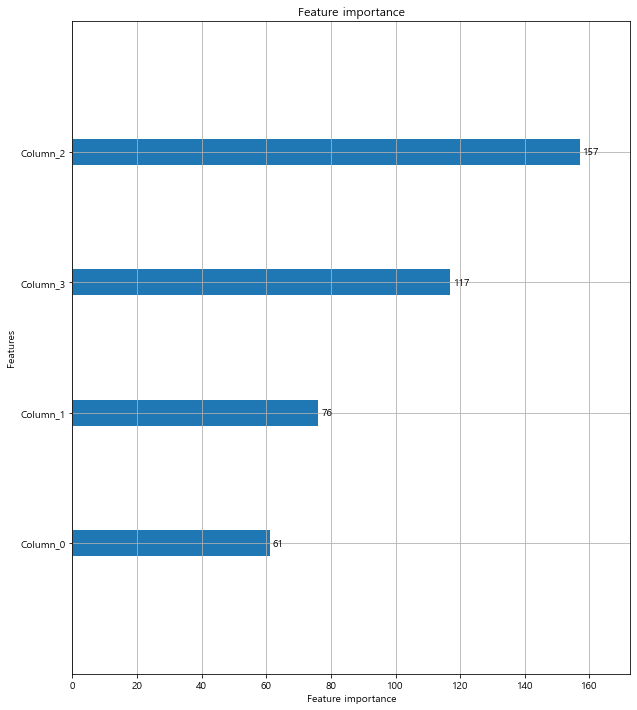

In [67]:
plot_importance(lgbc, figsize=(10, 12))

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='multi_logloss'>

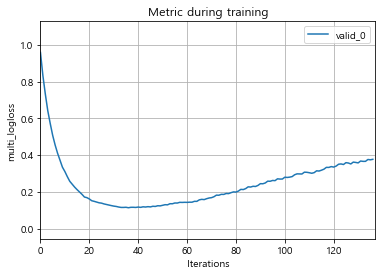

In [69]:
plot_metric(lgbc) # 가중치 변화 (제일 낮은게 좋음)

<AxesSubplot:>

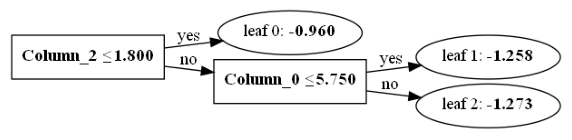

In [70]:
plot_tree(lgbc, figsize=(10,12))

+ wine data sample

In [77]:
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=.2,
                                                   random_state=123)

lgbc = LGBMClassifier(n_estimators=400)
lgbc.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss",
        eval_set=[(X_test, y_test)], verbose=True)

print("훈련 정확도 : ", lgbc.score(X_train, y_train))
print("테스트 정확도 :", lgbc.score(X_test, y_test))

cross_val = cross_validate(estimator=lgbc, X=wine.data, y=wine.target, cv=5)
print("테스트 정확도 평균 : ", cross_val["test_score"].mean())

[1]	valid_0's multi_logloss: 1.05985
[2]	valid_0's multi_logloss: 0.941671
[3]	valid_0's multi_logloss: 0.838354
[4]	valid_0's multi_logloss: 0.761596
[5]	valid_0's multi_logloss: 0.677439
[6]	valid_0's multi_logloss: 0.607711
[7]	valid_0's multi_logloss: 0.556301
[8]	valid_0's multi_logloss: 0.51301
[9]	valid_0's multi_logloss: 0.460772
[10]	valid_0's multi_logloss: 0.418941
[11]	valid_0's multi_logloss: 0.386691
[12]	valid_0's multi_logloss: 0.354477
[13]	valid_0's multi_logloss: 0.325968
[14]	valid_0's multi_logloss: 0.302653
[15]	valid_0's multi_logloss: 0.279562
[16]	valid_0's multi_logloss: 0.258911
[17]	valid_0's multi_logloss: 0.239598
[18]	valid_0's multi_logloss: 0.220811
[19]	valid_0's multi_logloss: 0.203974
[20]	valid_0's multi_logloss: 0.188324
[21]	valid_0's multi_logloss: 0.175522
[22]	valid_0's multi_logloss: 0.162242
[23]	valid_0's multi_logloss: 0.151123
[24]	valid_0's multi_logloss: 0.140635
[25]	valid_0's multi_logloss: 0.132925
[26]	valid_0's multi_logloss: 0.1251

[275]	valid_0's multi_logloss: 0.00345521
[276]	valid_0's multi_logloss: 0.00345521
[277]	valid_0's multi_logloss: 0.00345521
[278]	valid_0's multi_logloss: 0.00345521
[279]	valid_0's multi_logloss: 0.00345521
[280]	valid_0's multi_logloss: 0.00345521
[281]	valid_0's multi_logloss: 0.00345521
[282]	valid_0's multi_logloss: 0.00345521
[283]	valid_0's multi_logloss: 0.00345521
[284]	valid_0's multi_logloss: 0.00345521
[285]	valid_0's multi_logloss: 0.00345521
[286]	valid_0's multi_logloss: 0.00345521
[287]	valid_0's multi_logloss: 0.00345521
[288]	valid_0's multi_logloss: 0.00345521
[289]	valid_0's multi_logloss: 0.00345521
[290]	valid_0's multi_logloss: 0.00345521
[291]	valid_0's multi_logloss: 0.00345521
[292]	valid_0's multi_logloss: 0.00345521
[293]	valid_0's multi_logloss: 0.00345521
[294]	valid_0's multi_logloss: 0.00345521
[295]	valid_0's multi_logloss: 0.00345521
[296]	valid_0's multi_logloss: 0.00345521
[297]	valid_0's multi_logloss: 0.00345521
[298]	valid_0's multi_logloss: 0.0

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='multi_logloss'>

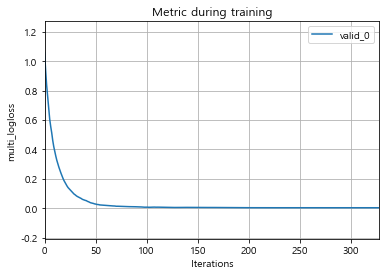

In [73]:
plot_metric(lgbc)

+ 유방암 데이터셋

In [78]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=.2,
                                                   random_state=123)

lgbc = LGBMClassifier(n_estimators=400)
lgbc.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss",
        eval_set=[(X_test, y_test)], verbose=True)

print("훈련 정확도 : ", lgbc.score(X_train, y_train))
print("테스트 정확도 :", lgbc.score(X_test, y_test))

cross_val = cross_validate(estimator=lgbc, X=cancer.data, y=cancer.target, cv=5)
print("테스트 정확도 평균 : ", cross_val["test_score"].mean())

[1]	valid_0's binary_logloss: 0.575665
[2]	valid_0's binary_logloss: 0.513919
[3]	valid_0's binary_logloss: 0.463418
[4]	valid_0's binary_logloss: 0.420506
[5]	valid_0's binary_logloss: 0.383433
[6]	valid_0's binary_logloss: 0.351962
[7]	valid_0's binary_logloss: 0.325134
[8]	valid_0's binary_logloss: 0.301618
[9]	valid_0's binary_logloss: 0.276072
[10]	valid_0's binary_logloss: 0.259487
[11]	valid_0's binary_logloss: 0.244766
[12]	valid_0's binary_logloss: 0.224551
[13]	valid_0's binary_logloss: 0.211222
[14]	valid_0's binary_logloss: 0.197052
[15]	valid_0's binary_logloss: 0.187863
[16]	valid_0's binary_logloss: 0.180071
[17]	valid_0's binary_logloss: 0.172646
[18]	valid_0's binary_logloss: 0.162952
[19]	valid_0's binary_logloss: 0.154079
[20]	valid_0's binary_logloss: 0.146169
[21]	valid_0's binary_logloss: 0.140076
[22]	valid_0's binary_logloss: 0.132763
[23]	valid_0's binary_logloss: 0.127181
[24]	valid_0's binary_logloss: 0.119348
[25]	valid_0's binary_logloss: 0.114732
[26]	vali

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

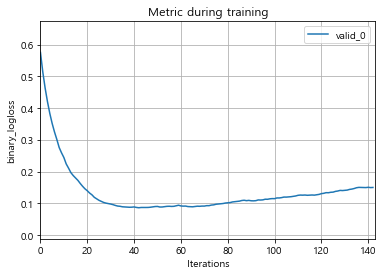

In [75]:
plot_metric(lgbc)

### 2) LGBMRegressor

+ boston 데이터 샘플

In [85]:
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=.2,
                                                   random_state=123)

lgbmr = LGBMRegressor(n_estmiators=400)
lgbmr.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss",
        eval_set=[(X_test, y_test)], verbose=True)

print("훈련 정확도 : ", lgbmr.score(X_train, y_train))
print("테스트 정확도 :", lgbmr.score(X_test, y_test))

[LightGBM] [Warning] Unknown parameter: n_estmiators
[1]	valid_0's l2: 71.4897
[2]	valid_0's l2: 61.8603
[3]	valid_0's l2: 54.0848
[4]	valid_0's l2: 47.9263
[5]	valid_0's l2: 43.0702
[6]	valid_0's l2: 39.268
[7]	valid_0's l2: 36.2667
[8]	valid_0's l2: 33.8931
[9]	valid_0's l2: 31.7028
[10]	valid_0's l2: 30.082
[11]	valid_0's l2: 29.1638
[12]	valid_0's l2: 27.9059
[13]	valid_0's l2: 27.2503
[14]	valid_0's l2: 26.3942
[15]	valid_0's l2: 26.0862
[16]	valid_0's l2: 25.6483
[17]	valid_0's l2: 25.0221
[18]	valid_0's l2: 24.919
[19]	valid_0's l2: 24.5501
[20]	valid_0's l2: 24.2858
[21]	valid_0's l2: 23.9636
[22]	valid_0's l2: 23.8872
[23]	valid_0's l2: 23.676
[24]	valid_0's l2: 23.5907
[25]	valid_0's l2: 23.4353
[26]	valid_0's l2: 23.1653
[27]	valid_0's l2: 23.0198
[28]	valid_0's l2: 22.8605
[29]	valid_0's l2: 22.8311
[30]	valid_0's l2: 22.8943
[31]	valid_0's l2: 22.8056
[32]	valid_0's l2: 22.9915
[33]	valid_0's l2: 22.9286
[34]	valid_0's l2: 23.0395
[35]	valid_0's l2: 22.76
[36]	valid_0's l2

In [81]:
cross_val = cross_validate(estimator=lgbmr, X=boston.data, y=boston.target, cv=5)
print("테스트 정확도 평균 : ", cross_val["test_score"].mean())

[LightGBM] [Warning] Unknown parameter: n_estmiators
[LightGBM] [Warning] Unknown parameter: n_estmiators
[LightGBM] [Warning] Unknown parameter: n_estmiators
[LightGBM] [Warning] Unknown parameter: n_estmiators
[LightGBM] [Warning] Unknown parameter: n_estmiators
테스트 정확도 평균 :  0.5799586849005655


+ 당뇨병 데이터 샘플

In [84]:
diabetes = load_diabetes()

X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=.2,
                                                   random_state=123)

lgbmr = LGBMRegressor(n_estimators=400)
lgbmr.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss",
        eval_set=[(X_test, y_test)], verbose=True)

print("훈련 정확도 : ", lgbmr.score(X_train, y_train))
print("테스트 정확도 :", lgbmr.score(X_test, y_test))

[1]	valid_0's l2: 5692.17
[2]	valid_0's l2: 5218.79
[3]	valid_0's l2: 4835.34
[4]	valid_0's l2: 4479.84
[5]	valid_0's l2: 4183.42
[6]	valid_0's l2: 3924.35
[7]	valid_0's l2: 3726.96
[8]	valid_0's l2: 3555.3
[9]	valid_0's l2: 3407.95
[10]	valid_0's l2: 3291.33
[11]	valid_0's l2: 3201.78
[12]	valid_0's l2: 3114.69
[13]	valid_0's l2: 3059.18
[14]	valid_0's l2: 3005.79
[15]	valid_0's l2: 2945.18
[16]	valid_0's l2: 2876.37
[17]	valid_0's l2: 2822.71
[18]	valid_0's l2: 2791.31
[19]	valid_0's l2: 2786.39
[20]	valid_0's l2: 2745.25
[21]	valid_0's l2: 2724.07
[22]	valid_0's l2: 2705.17
[23]	valid_0's l2: 2685.41
[24]	valid_0's l2: 2663.2
[25]	valid_0's l2: 2659.75
[26]	valid_0's l2: 2636.48
[27]	valid_0's l2: 2615.15
[28]	valid_0's l2: 2640.63
[29]	valid_0's l2: 2624.73
[30]	valid_0's l2: 2615.14
[31]	valid_0's l2: 2601.41
[32]	valid_0's l2: 2593.79
[33]	valid_0's l2: 2555.64
[34]	valid_0's l2: 2572.12
[35]	valid_0's l2: 2581.22
[36]	valid_0's l2: 2573.21
[37]	valid_0's l2: 2562.82
[38]	valid_0

In [83]:
cross_val = cross_validate(estimator=lgbmr, X=diabetes.data, y=diabetes.target, cv=5)
print("테스트 정확도 평균 : ", cross_val["test_score"].mean())

테스트 정확도 평균 :  0.30867643947179507


# 4. Voting Classifier

- 여러가지 알고리즘을 비교해서 좋은 알고리즘 하나를 뽑음

In [86]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=.2,
                                                   random_state=123)


In [87]:
lr_clf = LogisticRegression(max_iter=10000)
knn_clf = KNeighborsClassifier(n_neighbors=8)

In [89]:
vo_clf = VotingClassifier(estimators=[("LR", lr_clf), ("KNN", knn_clf)], voting = "soft")

In [91]:
vo_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('LR', LogisticRegression(max_iter=10000)),
                             ('KNN', KNeighborsClassifier(n_neighbors=8))],
                 voting='soft')

In [92]:
pred = vo_clf.predict(X_test)
print("정확도 : ", accuracy_score(y_test, pred))

정확도 :  0.9736842105263158


In [97]:
classifiers = [lr_clf, knn_clf]

for clf in classifiers:
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    
    class_name = clf.__class__.__name__
    print("{} 정확도 : {}".format(class_name, accuracy_score(y_test,preds)))

LogisticRegression 정확도 : 0.9824561403508771
KNeighborsClassifier 정확도 : 0.9649122807017544
